1.9.2 Схема Горнера
количество операций 16010
Схема Горнера для данного многочлена непригодна для определения нуля,поскольку,как видно из графика,велика погрешность округления,установить ноль функции не удастся


<IPython.core.display.Javascript object>


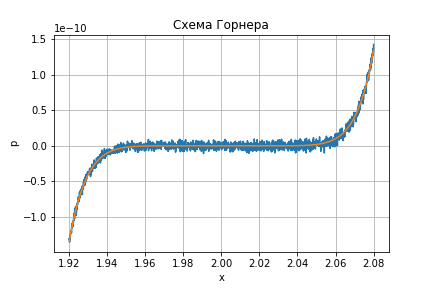

In [27]:
print('1.9.2','Схема Горнера')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import math as math

x0=1.92
xk=2.08
eps=10**(-4)
n=np.arange(x0,xk,eps)
#Коэффициенты из формулы Ньютона
coef=np.array([1,-18,144,-672,2016,-4032,5376,-4608,2304,-512])

num_of_operations=0
horner_value=np.array([])

for i in n :
    p=0
    
    for j in coef:
        p = p * i+ j 
        num_of_operations +=1
    horner_value=np.append(horner_value,p)
print('количество операций', num_of_operations)
print('Схема Горнера для данного многочлена непригодна для определения нуля,поскольку,как видно из графика,велика погрешность округления,установить ноль функции не удастся')
x=np.arange(x0,xk,eps)
y=np.array([])
y=(x-2)**9

fig, ax = plt.subplots()
ax.plot(n,horner_value)
ax.plot(x,y)
ax.set(xlabel='x',ylabel='p',title='Схема Горнера')
ax.grid()
plt.show()


In [4]:
print('2.10.6e','Система уравнений')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import math as math
a=10
n=99
#Заполняем матрицу А
A=np.zeros((n+1,n+1))
for j in range(0,n+1):
    for i in range (0,n+1):
        if i == j:
            A[i][j]=a
        else:
            A[i][j]=1/(i+1)
        if i < (j-1):
            A[i][j]=0

#print(A)
B=np.arange(1,n+2,1)
#print(B)
#Деление строки на число
def Dividing(C,D,row,divider):
    C[row] = [c / divider for c in C[row]]
    D[row] /= divider
def Swaping(C,D,row1,row2):
    C[row1], C[row2] = C[row2], C[row1]
    D[row1], D[row2]= D[row2],D[row1]
#Операция сложения строки системы с другой,главной,умноженной на  коэффициент
def Operation(C,D,row,main_row,coef):
    C[row]=[(c1+c2*coef) for c1,c2 in zip(C[row],C[main_row])]
    D[row] += D[main_row]*coef

def Gauss(C,D):
    column=0
    while (column < len(D)):
        current_row = None
        for i in range(column,len(C)):
            if current_row is None or abs(C[i][column]) > abs(C[current_row][column]):
                current_row = i
        if current_row is None:
            return None 
        if current_row !=column:
#Строка с макс.элементом идет выше,с единичным коэффициентом            
            Swaping(C,D,current_row,column)
            Dividing(C,D,column,C[column][column])
        for i in range(column+1,len(C)):
            Operation(C,D,i,column,-C[i][column])
        column +=1
#Свели матрицу к верхнетреугольному виду
    X=[0  for f in D]
    for i in range(len(D)-1,-1,-1):
        X[i] = D[i]-sum(x * c for x, c in zip(X[(i+1):], C[i][(i+1):]))
        
    return X

def Gauss1(A, B): # решение системы методом Гаусса (приведением к треугольному виду)
    column = 0
    while (column < len(B)):
        #print("Ищем максимальный по модулю элемент в {0}-м столбце:".format(column + 1))
        current_row = None
        for r in range(column, len(A)):
            if current_row is None or abs(A[r][column]) > abs(A[current_row][column]):
                 current_row = r
        if current_row is None:
            #print("решений нет")
            return None
        if current_row != column:
            #print("Переставляем строку с найденным элементом повыше:")
            Swaping(A, B, current_row, column)
        #print("Нормализуем строку с найденным элементом:")
        Dividing(A, B, column, A[column][column])
        #print("Обрабатываем нижележащие строки:")
        for r in range(column + 1, len(A)):
            Operation(A, B, r, column, -A[r][column])
        column += 1
    #print("Матрица приведена к треугольному виду, считаем решение")
    X = [0 for b in B]
    for i in range(len(B) - 1, -1, -1):
        X[i] = B[i] - sum(x * a for x, a in zip(X[(i + 1):], A[i][(i + 1):]))
    #print("Получили ответ:")
    #print("\n".join("X{0} =\t{1:10.2f}".format(i + 1, x) for i, x in enumerate(X)))
    return X

#result= Gauss(A,B)
#print(np.around(result,decimals = 3))

def Zeidel(A, b, eps):
    n = len(A)
    x = np.zeros(n) 
    converge = False
    while not converge:
        x_new = np.copy(x)
        for i in range(n):
            s1 = sum(A[i][j] * x_new[j] for j in range(i))
            s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
            x_new[i] = (b[i] - s1 - s2) / A[i][i]
        converge = np.sqrt(sum((x_new[i] - x[i]) ** 2 for i in range(n))) <= eps
        x = x_new
        #print (x)
    return x

def Neviazki (A, B, result):
    nev = np.array([])
    for i in range (0, n + 1):
        lol= 0
        for j in range (0, n + 1):
            lol += A[i][j] * result[j]
        nev = np.append(nev,[B[i] - lol])
        print (np.around((B[i] - lol), decimals = 15))
    return nev
#по первой норме считаем
def norm(A): 
    summma = 0
    for j in range(0, n + 1):
        summ = 0
        for i in range(0,n + 1): 
            summ += np.abs(A[i][j])
        if summ > summma:
            summa = summ
    return summa

print('Число обусловленности по первой норме:', norm(A)*norm(np.linalg.inv(A)))
print(A)
result = Gauss1(A, B)

print('Ответ по методу Гаусса:', np.around(result, decimals = 3))
print ('Невязки по методу Гаусса:', Neviazki(A, B, result))

                                           
res_sei = Zeidel(A, B, 10**(-3))
print('Ответ по методу Зейделя:', np.around(res_sei, decimals = 3))
print ('Невязки по методу Зейделя:', np.around((Neviazki(A, B, res_sei)), decimals = 8)) 



2.10.6e Система уравнений
Число обусловленности по первой норме: 1.0020232673027456
[[10.          1.          0.         ...  0.          0.
   0.        ]
 [ 0.5        10.          0.5        ...  0.          0.
   0.        ]
 [ 0.33333333  0.33333333 10.         ...  0.          0.
   0.        ]
 ...
 [ 0.01020408  0.01020408  0.01020408 ... 10.          0.01020408
   0.        ]
 [ 0.01010101  0.01010101  0.01010101 ...  0.01010101 10.
   0.01010101]
 [ 0.01        0.01        0.01       ...  0.01        0.01
  10.        ]]
Ответ по методу Гаусса: [-0.     0.    -0.     0.    -0.     0.    -0.     0.    -0.011  0.99
  0.991  0.992  0.992  0.993  0.993  0.994  0.994  0.994  0.995  0.995
  0.995  0.995  0.996  0.996  0.996  0.996  0.996  0.996  0.997  0.997
  0.997  0.997  0.997  0.997  0.997  0.997  0.997  0.997  0.997  0.998
  0.998  0.998  0.998  0.998  0.998  0.998  0.998  0.998  0.998  0.998
  0.998  0.998  0.998  0.998  0.998  0.998  0.998  0.998  0.998  0.998
  0.998  0.99

In [3]:
print('2.10.6e','Система уравнений,находим собственные числа')
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import math as math
a=10
n=99
#Заполняем матрицу А
A=np.zeros((n+1,n+1))
for j in range(0,n+1):
    for i in range (0,n+1):
        if i == j:
            A[i][j]=a
        else:
            A[i][j]=1/(i+1)
        if i < (j-1):
            A[i][j]=0
            
sobst = np.linalg.eigh(A)[0] 
print(' собственные числа матрицы А:', sobst)
print('максимальное собственное число:',  format(max(sobst),'.4f'), '  и минимальное',  format(min(sobst),'.4f'))
#a=np.array([[1,0,0],[0,1,0],[0,0,3]])
#b=np.array([[1],[1],[1]])
#c=np.array([1,1,1])
#total=c.dot(b)
u=np.zeros(n+1)
#=A.dot(u)
def stepen(A,n):
    u=np.zeros(n+1)
    #for j in range(0,n+1):
       # for i in range(0,n+1):
           # if i == j:
           #     A[i][j]=a
           # else:
           #     A[i][j]=1/(i+1)
            #if i < (j-1):
              #  A[i][j]=0
    for l in range(0,n+1):
        u[l]=1
        v=u
    for i in range(0,101):
        v1=A.dot(v)
        v=v1
    for k in range(0,100):
        u1=A.dot(u)
        u=u1
    return v1.dot(u1)/u1.dot(u1)
    
    
print('собственное макс значение степенной метод:',stepen(A,99))
lambd=np.linalg.eigh(A)[0]
#print(format(max(lambd),'.4f'))
A_inv=np.linalg.inv(A)
print('собственное минимальное значение степенной метод',1/stepen(A_inv,99))
lambd=np.linalg.eigh(A_inv)[0]
print(format(1/max(lambd),'.4f'))
B=np.array([[3,0,0],[0,4,0],[0,0,5]])
B_inv=np.linalg.inv(B)
print('максимальное значение матрицы B',stepen(B,2))
print('минимальное значение матрицы B',1/stepen(B_inv,2))

2.10.6e Система уравнений,находим собственные числа
 собственные числа матрицы А: [ 9.5         9.70710678  9.78867513  9.83333333  9.8618034   9.88164966
  9.89632741  9.90765048  9.91666667  9.92402531  9.93015113  9.9353341
  9.93977917  9.94363548  9.94701421  9.95        9.95265848  9.95504131
  9.95718976  9.9591372   9.96091089  9.96253337  9.96402338  9.9653967
  9.96666667  9.96784465  9.96894039  9.96996231  9.97091769  9.9718129
  9.97265351  9.97344441  9.97418993  9.9748939   9.97555973  9.97619048
  9.97678886  9.97735734  9.97789811  9.97841318  9.97890434  9.97937325
  9.97982139  9.98025013  9.98066071  9.98105427  9.98143185  9.98179442
  9.98214286  9.98247799  9.98280056  9.98311128  9.98341078  9.98369967
  9.98397852  9.98424783  9.98450809  9.98475976  9.98500326  9.98523897
  9.98546728  9.98568853  9.98590303  9.98611111  9.98631304  9.9865091
  9.98669954  9.98688459  9.9870645   9.98723946  9.98740969  9.98757537
  9.98773668  9.9878938   9.98804689  9.988196